In [35]:
import os
import random
import time
import cv2
import tkinter
import custom_tkinter
import tkinter.messagebox

import meta_dataset
import meta_image2mat
import meta_recognitionPCA

import PIL.Image
from PIL import ImageTk, Image
from tkinter import Tk, Label, Button, Canvas



In [36]:
# parameters
recognition_type = 'image'

In [37]:
# cv2 CascadeClassifier
face_cascade = cv2.CascadeClassifier('cascade/haarcascade_frontalface_default.xml')
left_eye_cascade = cv2.CascadeClassifier('cascade/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier('cascade/haarcascade_righteye_2splits.xml')

In [38]:
# image path
dir_path = './image_recognize/'
face_path = os.path.join(dir_path, 'face')
left_eye_path = os.path.join(dir_path, 'left_eye')
right_eye_path = os.path.join(dir_path, 'right_eye')

# create the path
if not os.path.exists(dir_path):
    os.mkdir(dir_path)
if not os.path.exists(face_path):
    os.makedirs(face_path)
if not os.path.exists(left_eye_path):
    os.makedirs(left_eye_path)
if not os.path.exists(right_eye_path):
    os.makedirs(right_eye_path)

In [39]:
# print the path
print(f"face_path: {face_path}")
print(f"left_eye_path: {left_eye_path}")
print(f"right_eye_path: {right_eye_path}")

face_path: ./image_recognize/face
left_eye_path: ./image_recognize/left_eye
right_eye_path: ./image_recognize/right_eye


In [40]:
datasetFolder = './image_train/'

In [41]:
# datasetFolder下面每一个文件夹的名字是类别名字，每一个文件夹下面是该类别的图片
# 读取datasetFolder下面的所有文件夹
folderList = os.listdir(datasetFolder)
# remove .DS_Store
folderList.remove('.DS_Store')

In [42]:
folderList

['Benjamin Netanyahu',
 'Cao Jiayuan',
 'CHUAKOKCHUNG',
 'Damon',
 'Denzel Washington',
 'Hee Song Yung',
 'Kanye_west',
 'Lean Ting Jin',
 'Lee Yi Shien_Pic',
 'Li Haoyuan',
 'Li Ruisheng',
 'Liu Aofan',
 'Morgan Freeman',
 'Nicki_Minaj',
 'Sharmeen_Obaid_chinoy',
 'Smith Watson',
 'Tan Qianqian',
 'Taylor Swift',
 'Trump',
 'Ye Xichun',
 'Zhang Yixin',
 'Zhu Zixuan']

In [43]:
# 读取每一个文件夹下面的图片,并且将图片转换成矩阵
# import train_test_split
from sklearn.model_selection import train_test_split

In [44]:
dataset_pca = []
dataset_label = []
for folder in folderList:
    # 读取每一个文件夹下面的图片
    imageList = os.listdir(os.path.join(datasetFolder, folder))
    # remove .DS_Store
    if '.DS_Store' in imageList:
        imageList.remove('.DS_Store')
    for image in imageList:
        # 读取图片
        image_path = os.path.join(datasetFolder, folder, image)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        dataset_pca.append(gray_image)
        dataset_label.append(folder)

In [45]:
# pca prepare process
datasetClass = meta_dataset.DatasetClass('image_train')
image_mat = meta_image2mat.Image2Mat(datasetClass.get_training_image_path(), 100, 100)

pca_matrix = image_mat.get_image_mat()
image_label = datasetClass.get_training_label()
image_width = image_mat.get_image_width()
image_height = image_mat.get_image_height()
category_name = datasetClass.get_category_name()
category_num = datasetClass.get_category_num()

recognitionPCA = meta_recognitionPCA.RecognitionPCA(pca_matrix,
                                                    image_label,
                                                    image_width,
                                                    image_height,
                                                    category_name,
                                                    category_num)
recognitionPCA.calculate_mean_face()
recognitionPCA.reduce_lim()

Dataset Establish : dataset_dir detected.
Dataset Path: ['.DS_Store', 'Benjamin Netanyahu', 'Cao Jiayuan', 'CHUAKOKCHUNG', 'Damon', 'Denzel Washington', 'Hee Song Yung', 'Kanye_west', 'Lean Ting Jin', 'Lee Yi Shien_Pic', 'Li Haoyuan', 'Li Ruisheng', 'Liu Aofan', 'Morgan Freeman', 'Nicki_Minaj', 'Sharmeen_Obaid_chinoy', 'Smith Watson', 'Tan Qianqian', 'Taylor Swift', 'Trump', 'Ye Xichun', 'Zhang Yixin', 'Zhu Zixuan']
Dataset Path Num: 23

---------------------------------
Category Establish : .DS_Store detected.
Category Establish : Benjamin Netanyahu detected.
Image Path: image_train\Benjamin Netanyahu\Benjamin Netanyahu_0000.jpg
Image Shape: (100, 100, 3)
Image Path: image_train\Benjamin Netanyahu\Benjamin Netanyahu_0001.jpg
Image Shape: (100, 100, 3)
Image Path: image_train\Benjamin Netanyahu\Benjamin Netanyahu_0002.jpg
Image Shape: (100, 100, 3)
Image Path: image_train\Benjamin Netanyahu\Benjamin Netanyahu_0003.jpg
Image Shape: (100, 100, 3)
Image Path: image_train\Benjamin Netanyah

matrix([[ -541.71140636, -3026.75319654, -1074.91837943, ...,
         -3887.82605953, -3655.09785662, -3059.9488522 ],
        [  868.05061349, -2121.20284878,  1551.56048982, ...,
          -831.20159381,  -420.83870088,  -487.7873989 ],
        [-1861.42828731,  1193.84747194,  1010.77941801, ...,
           895.67251693,   449.03382109,  -273.86267282],
        ...,
        [ -121.14289848,   215.84327167,  -101.69422698, ...,
           -46.02239559,    27.36790705,   209.63613793],
        [ -109.01213474,   -46.12540141,    45.17414749, ...,
            80.7179144 ,    58.91138431,    42.68078926],
        [ -116.07533197,   205.43062183,    95.90004223, ...,
           108.23993728,    52.93814843,  -151.94887966]])

In [46]:
len(dataset_pca)

110

In [47]:
total = len(dataset_pca)

In [48]:
def inference(matrix):
    new_coordinate = recognitionPCA.new_coor(matrix)
    name = recognitionPCA.recognition(new_coordinate)
    return name

In [49]:
print(dataset_pca[0].shape)

(100, 100)


In [50]:
inference(dataset_pca[0])

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu


'Benjamin Netanyahu'

In [51]:
# 对于每一个都做一遍预测，看看准确率
correct = 0
for i in range(total):
    name = inference(dataset_pca[i])
    if name == dataset_label[i]:
        correct += 1

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

In [52]:
correct

92

In [53]:
correct / total

0.8363636363636363

In [54]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

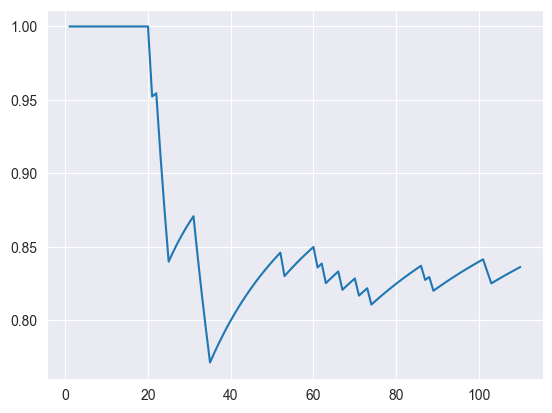

In [55]:
# draw a graph to show the accuracy change while the number of training data changes
accuracy_graph = []
number_change = []

# 对于每一个都做一遍预测，看看准确率
correct = 0
for i in range(total):
    name = inference(dataset_pca[i])
    if name == dataset_label[i]:
        correct += 1
    accuracy_graph.append(correct / (i + 1))
    number_change.append(i + 1)

# 根据accuracy_graph和number_change画图

plt.plot(number_change, accuracy_graph)

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

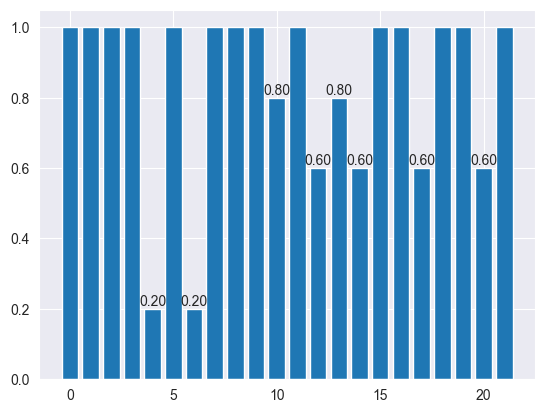

In [56]:
# use a bar graph to show the accuracy of each category
category_accuracy = {}
for i in range(total):
    name = inference(dataset_pca[i])
    if name == dataset_label[i]:
        if name in category_accuracy:
            category_accuracy[name] += 1
        else:
            category_accuracy[name] = 1

# 根据每个类别的准确率画图
bar_graph = []
for key in category_accuracy:
    bar_graph.append(category_accuracy[key] / 5)

# and label the bar that is not 1
plt.bar(range(len(bar_graph)), bar_graph)
for i in range(len(bar_graph)):
    if bar_graph[i] != 1:
        plt.text(i, bar_graph[i], '%.2f' % bar_graph[i], ha='center', va='bottom', fontsize=10)

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

([<matplotlib.patches.Wedge at 0x1d1c4a85848>,
 [Text(1.0840054683476792, 0.18690143015057137, 'Benjamin Netanyahu'),
  Text(0.9588265071602532, 0.5391212564598701, 'Cao Jiayuan'),
  Text(0.72292402138744, 0.8290843499313036, 'CHUAKOKCHUNG'),
  Text(0.4035395969555395, 1.0233063049199693, 'Damon'),
  Text(0.1869013698897456, 1.0840054787376938, 'Denzel Washington'),
  Text(-0.03755528301813975, 1.0993587224911747, 'Hee Song Yung'),
  Text(-0.260440929809648, 1.0687237819380113, 'Kanye_west'),
  Text(-0.47243185658298126, 0.9933821726231842, 'Lean Ting Jin'),
  Text(-0.7778175230266602, 0.7778173955837392, 'Lee Yi Shien_Pic'),
  Text(-0.9933822500296304, 0.4724316938204601, 'Li Haoyuan'),
  Text(-1.0897545560355704, 0.1497832019944734, 'Li Ruisheng'),
  Text(-1.0840054486613266, -0.1869015443289764, 'Liu Aofan'),
  Text(-0.9933821449780184, -0.4724319147124499, 'Morgan Freeman'),
  Text(-0.8532823215752978, -0.69419685946212, 'Nicki_Minaj'),
  Text(-0.6646598928916642, -0.87648572537220

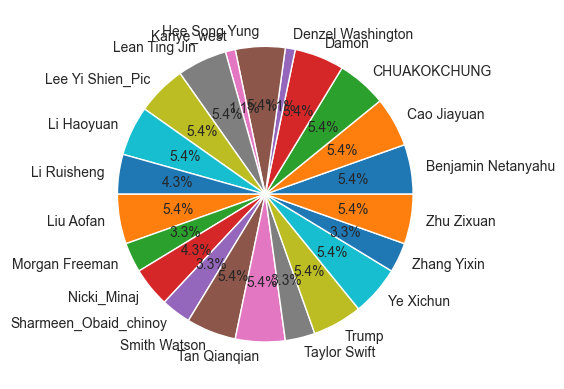

In [57]:
# draw a pie chart to show the accuracy of each category
category_accuracy = {}
for i in range(total):
    name = inference(dataset_pca[i])
    if name == dataset_label[i]:
        if name in category_accuracy:
            category_accuracy[name] += 1
        else:
            category_accuracy[name] = 1

# 根据每个类别的准确率画图
pie_graph = []
for key in category_accuracy:
    pie_graph.append(category_accuracy[key] / 5)

# and label the bar that is not 1
plt.pie(pie_graph, labels=category_name, autopct='%1.1f%%')

In [58]:
# 计算LOG-Loss

log_loss = 0
for i in range(total):
    new_coordinate = recognitionPCA.new_coor(dataset_pca[i])
    name = recognitionPCA.recognition(new_coordinate)
    if name == dataset_label[i]:
        log_loss += 0
    else:
        log_loss += 1

log_loss = log_loss / total

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

In [59]:
log_loss

0.16363636363636364

In [60]:
# 计算F1-Score
f1score = 0
precision = 0
recall = 0

for i in range(total):
    new_coordinate = recognitionPCA.new_coor(dataset_pca[i])
    name = recognitionPCA.recognition(new_coordinate)
    if name == dataset_label[i]:
        precision += 1
        recall += 1
    else:
        recall += 1

precision = precision / total
recall = recall / total
f1score = 2 * precision * recall / (precision + recall)


The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

In [61]:
f1score

0.9108910891089108

The distance is:  4112.699825974869
The image is:  Benjamin Netanyahu
The distance is:  4991.248917866546
The image is:  Benjamin Netanyahu
The distance is:  2719.7601061193122
The image is:  Benjamin Netanyahu
The distance is:  3313.471569220933
The image is:  Benjamin Netanyahu
The distance is:  3192.550596378231
The image is:  Benjamin Netanyahu
The distance is:  4003.1099135032555
The image is:  Cao Jiayuan
The distance is:  3512.450277758967
The image is:  Cao Jiayuan
The distance is:  3214.6315248129367
The image is:  Cao Jiayuan
The distance is:  2531.44190579075
The image is:  Cao Jiayuan
The distance is:  3031.143855680678
The image is:  Cao Jiayuan
The distance is:  690.5958306571192
The image is:  CHUAKOKCHUNG
The distance is:  1758.016813174741
The image is:  CHUAKOKCHUNG
The distance is:  2618.3615824031685
The image is:  CHUAKOKCHUNG
The distance is:  841.9576989744671
The image is:  CHUAKOKCHUNG
The distance is:  1257.8679942290364
The image is:  CHUAKOKCHUNG
The distanc

<AxesSubplot:xlabel='None-label', ylabel='predict'>

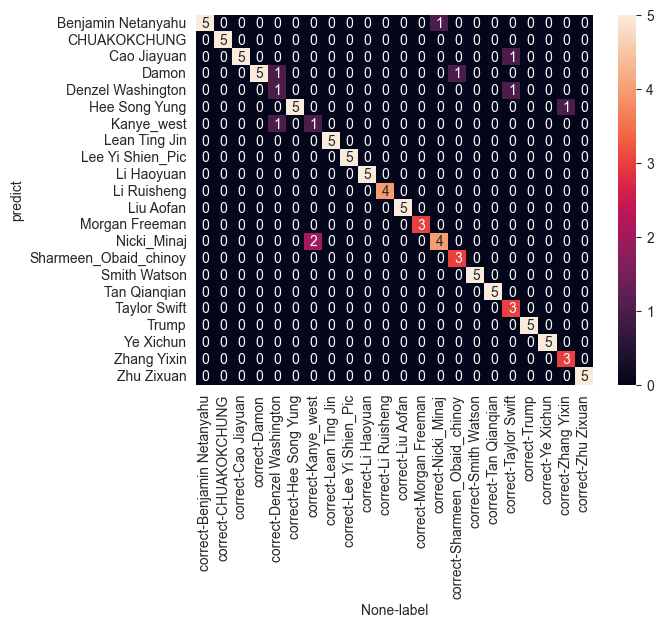

In [62]:
# confusion matrix list
confusion_matrix = [[]]
for i in range(total):
    new_coordinate = recognitionPCA.new_coor(dataset_pca[i])
    name = recognitionPCA.recognition(new_coordinate)
    if name == dataset_label[i]:
        confusion_matrix.append([name, name, 1])
    else:
        confusion_matrix.append([name, dataset_label[i], 0])
# graph
import seaborn
import matplotlib.pyplot as plt
import pandas as pd

graph = pd.DataFrame(confusion_matrix)
graph.columns = ['predict', 'label', 'correct']
graph = graph.drop(0)
graph = graph.groupby(['predict', 'label']).count()
graph = graph.unstack()
graph = graph.fillna(0)
graph = graph.astype(int)

seaborn.heatmap(graph, annot=True, fmt='d')

